# Name: Shaswata Das
# Registration No: 2017831050

<a target="_blank" href="https://colab.research.google.com/github/shaswata56/ML-Lab/blob/main/Final/ML_Lab_Final_Assignment_2017831050.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown --id 1sA7TEvhSAH3KZrBkad15nGK0reJvuxWx
!unzip -o CNN_dataset.zip

In [4]:
# Loading Dataset and splitting into train and validation
datasetPath = '/content/CNN_dataset/'

img_datagen = ImageDataGenerator(rescale=1./225,
                                 shear_range=0.2, 
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 validation_split=0.1)

training_dataset = img_datagen.flow_from_directory(
                                          directory=datasetPath, 
                                          target_size=(64, 64), 
                                          shuffle=True,
                                          batch_size=8, 
                                          subset='training',
                                          class_mode='categorical')

validation_dataset = img_datagen.flow_from_directory(
                                          directory=datasetPath, 
                                          target_size=(64, 64), 
                                          shuffle=True,
                                          batch_size=8, 
                                          subset='validation',
                                          class_mode='categorical')

Found 45000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [5]:
class_dict = training_dataset.class_indices
class_names = [str(keys) for keys in class_dict]
print(class_names)

['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


In [6]:
# The Convolutional Neural Network
cnn_clf = Sequential()
cnn_clf.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(Flatten())
cnn_clf.add(Dense(64, activation='relu'))
cnn_clf.add(Dropout(0.3))
cnn_clf.add(Dense(5, activation='softmax'))
cnn_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [7]:
# Compiling the model
cnn_clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Model Training
history = cnn_clf.fit(training_dataset, epochs=15, validation_data=validation_dataset)
cnn_clf.save_weights('/content/cnn_clf')

Epoch 1/15
5625/5625 [==============================] - 121s 19ms/step - loss: 0.1789 - accuracy: 0.9344 - val_loss: 0.0234 - val_accuracy: 0.9906
Epoch 2/15
5625/5625 [==============================] - 100s 18ms/step - loss: 0.0532 - accuracy: 0.9828 - val_loss: 0.0193 - val_accuracy: 0.9940
Epoch 3/15
5625/5625 [==============================] - 99s 18ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0101 - val_accuracy: 0.9956
Epoch 4/15
5625/5625 [==============================] - 99s 18ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0109 - val_accuracy: 0.9976
Epoch 5/15
5625/5625 [==============================] - 99s 18ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0081 - val_accuracy: 0.9970
Epoch 6/15
5625/5625 [==============================] - 99s 18ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/15
5625/5625 [==============================] - 99s 18ms/step - loss: 0.0255 - accuracy: 0.9934 - val_loss: 0.0100

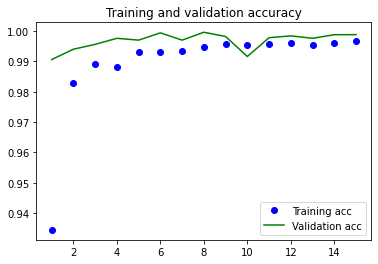

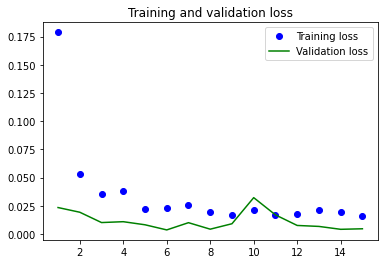

In [9]:
# Plotting Accuracy vs Loss over the epoch during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

57454/57454 [==============================] - 0s 2us/step


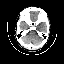

1/1 [==============================] - 0s 187ms/step
This image most likely belongs to HeadCT with a 40.46 percent confidence.


In [10]:
headct_url = 'http://headctstudy.qure.ai/static/imgs/stacks/QURE-8/12_orig.png'
headct_path = tf.keras.utils.get_file('Head_CT', origin=headct_url)

head_img = tf.keras.utils.load_img(
    headct_path, target_size=(64, 64)
)
display(head_img)
img_array = tf.keras.utils.img_to_array(head_img)
img_array = tf.expand_dims(img_array, 0)

predictions = cnn_clf.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

175498/175498 [==============================] - 0s 2us/step


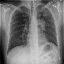

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to CXR with a 40.46 percent confidence.


In [11]:
chestxr_url = 'https://breathe.ersjournals.com/content/breathe/12/2/e50/F1.large.jpg'
chestxr_path = tf.keras.utils.get_file('Chest_XR', origin=chestxr_url)

chestxr_img = tf.keras.utils.load_img(
    chestxr_path, target_size=(64, 64)
)
display(chestxr_img)
ximg_array = tf.keras.utils.img_to_array(chestxr_img)
ximg_array = tf.expand_dims(ximg_array, 0)

predictions = cnn_clf.predict(ximg_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

505312/505312 [==============================] - 0s 0us/step


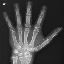

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to Hand with a 40.46 percent confidence.


In [12]:
hand_url = 'https://upload.wikimedia.org/wikipedia/commons/e/e2/X-ray_of_normal_hand_by_dorsoplantar_projection.jpg'
hand_path = tf.keras.utils.get_file('hand', origin=hand_url)

hand_img = tf.keras.utils.load_img(
    hand_path, target_size=(64, 64)
)
display(hand_img)
himg_array = tf.keras.utils.img_to_array(hand_img)
himg_array = tf.expand_dims(himg_array, 0)

predictions = cnn_clf.predict(himg_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)